# **COVID-19 Global Forecasting - Week 3 Data Analysis**

### **Importing Libraries**

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
from datetime import date

#plotting graphs
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

#For Feature Engineering and Train/Test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#data modeling
from sklearn import model_selection
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Import Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
train = pd.read_csv('train_w3.csv')
#train['Date'] = train['Date'].strftime("%x")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22338 entries, 0 to 22337
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              22338 non-null  int64  
 1   Province_State  9490 non-null   object 
 2   Country_Region  22338 non-null  object 
 3   Date            22338 non-null  object 
 4   ConfirmedCases  22338 non-null  float64
 5   Fatalities      22338 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.0+ MB


In [ ]:
train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [ ]:
test = pd.read_csv('test_w3.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13158 entries, 0 to 13157
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ForecastId      13158 non-null  int64 
 1   Province_State  5590 non-null   object
 2   Country_Region  13158 non-null  object
 3   Date            13158 non-null  object
dtypes: int64(1), object(3)
memory usage: 411.3+ KB


In [ ]:
test.head()

,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-03-26
1,2,NaN,Afghanistan,2020-03-27
2,3,NaN,Afghanistan,2020-03-28
3,4,NaN,Afghanistan,2020-03-29
4,5,NaN,Afghanistan,2020-03-30


In [ ]:
test['Date'].unique()

array(['2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
       '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
       '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
       '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
       '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
       '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18',
       '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22',
       '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26',
       '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
       '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
       '2020-05-05', '2020-05-06', '2020-05-07'], dtype=object)

### **Exploratory Data Analysis (EDA)**

The distribution of Confirmed Cases and Fatalities is pretty large! We will need to scale these 2 fields such that the model does not cause any drastic predictions.

In [ ]:
print('Date range from: ',train['Date'].min(),' to ', train['Date'].max())
print('Confirmed Cases range from: ',train['ConfirmedCases'].min(),' to ', train['ConfirmedCases'].max())
print('Fatalities range from: ',train['Fatalities'].min(),' to ', train['Fatalities'].max())

Date range from:  2020-01-22  to  2020-04-03
Confirmed Cases range from:  0.0  to  119827.0
Fatalities range from:  0.0  to  14681.0


In [ ]:
train[['ConfirmedCases','Fatalities']].describe()

,ConfirmedCases,Fatalities
count,22338.000000,22338.000000
mean,610.647372,26.520906
std,5150.283215,354.743581
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,45.000000,0.000000
max,119827.000000,14681.000000


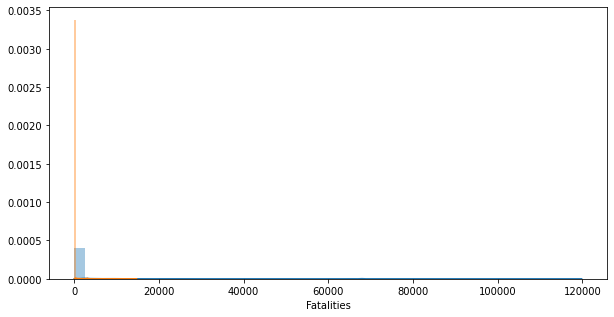

In [ ]:
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.distplot(train['ConfirmedCases'])
sns.distplot(train['Fatalities']);

In [ ]:
train.isnull().sum()

Id                    0
Province_State    12848
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [ ]:
test.isnull().sum()

ForecastId           0
Province_State    7568
Country_Region       0
Date                 0
dtype: int64

Not all data provided contains a Province/State, hence there are blank cells in the train.csv and test.csv. To minimize errors, we will fill 'NA' to these blank cells. 

In [ ]:
train['Province_State']= train['Province_State'].fillna('NA')
test['Province_State']= test['Province_State'].fillna('NA')

Let's check the unique set of values in each variable:

In [ ]:
# List all the column names into a list named: "column_names"
column_names = train.columns[:]
column_names

Index(['Id', 'Province_State', 'Country_Region', 'Date', 'ConfirmedCases',
       'Fatalities'],
      dtype='object')

In [ ]:
# For Loop function to print unique values in each column
for i in column_names:
    print(i, ": Volume Count >> ", train[i].nunique())
    print(i, ": Unique Values >> ", train[i].unique())

Id : Volume Count >>  22338
Id : Unique Values >>  [    1     2     3 ... 32706 32707 32708]
Province_State : Volume Count >>  131
Province_State : Unique Values >>  ['NA' 'Australian Capital Territory' 'New South Wales'
 'Northern Territory' 'Queensland' 'South Australia' 'Tasmania' 'Victoria'
 'Western Australia' 'Alberta' 'British Columbia' 'Manitoba'
 'New Brunswick' 'Newfoundland and Labrador' 'Northwest Territories'
 'Nova Scotia' 'Ontario' 'Prince Edward Island' 'Quebec' 'Saskatchewan'
 'Yukon' 'Anhui' 'Beijing' 'Chongqing' 'Fujian' 'Gansu' 'Guangdong'
 'Guangxi' 'Guizhou' 'Hainan' 'Hebei' 'Heilongjiang' 'Henan' 'Hong Kong'
 'Hubei' 'Hunan' 'Inner Mongolia' 'Jiangsu' 'Jiangxi' 'Jilin' 'Liaoning'
 'Macau' 'Ningxia' 'Qinghai' 'Shaanxi' 'Shandong' 'Shanghai' 'Shanxi'
 'Sichuan' 'Tianjin' 'Tibet' 'Xinjiang' 'Yunnan' 'Zhejiang'
 'Faroe Islands' 'Greenland' 'French Guiana' 'French Polynesia'
 'Guadeloupe' 'Martinique' 'Mayotte' 'New Caledonia' 'Reunion'
 'Saint Barthelemy' 'St Martin'

In [ ]:
print('Total Confirmed Cases:' , train['ConfirmedCases'].sum())

Total Confirmed Cases: 13640641.0


In [ ]:
print('Total Fatalities:' , train['Fatalities'].sum())

Total Fatalities: 592424.0


In [ ]:
train.shape

(22338, 6)

### **Plotting Confirmed and Fatalities by Date**

In [ ]:
train_grouped = train[['Date','ConfirmedCases','Fatalities']].groupby(['Date'], as_index=False).sum()
#train_grouped = train.drop('Id', axis=1)
train_grouped

,Date,ConfirmedCases,Fatalities
0,2020-01-22,554.0,17.0
1,2020-01-23,653.0,18.0
2,2020-01-24,939.0,26.0
3,2020-01-25,1432.0,42.0
4,2020-01-26,2113.0,56.0
...,...,...,...
68,2020-03-30,782200.0,37578.0
69,2020-03-31,857320.0,42103.0
70,2020-04-01,932434.0,46804.0
71,2020-04-02,1012981.0,52978.0


In [ ]:
train_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            73 non-null     object 
 1   ConfirmedCases  73 non-null     float64
 2   Fatalities      73 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.3+ KB


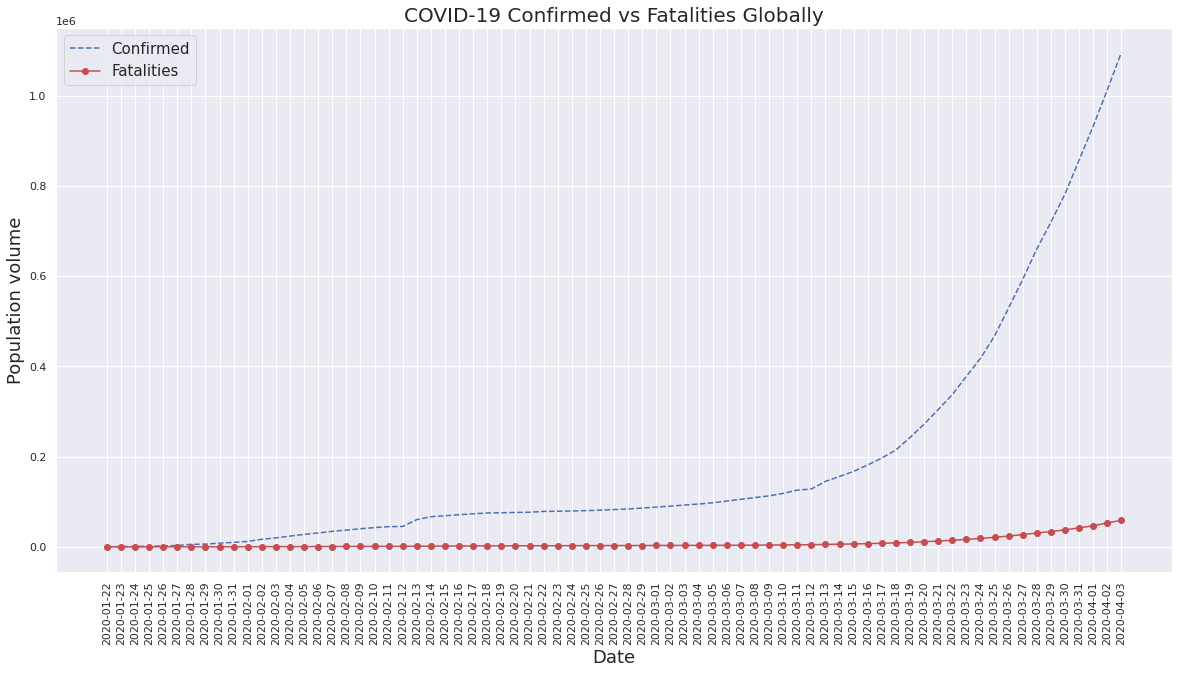

In [ ]:
x = train_grouped['Date']
y_confirmed = train_grouped['ConfirmedCases']
y_fatalities = train_grouped['Fatalities']

sns.set()
plt.figure(figsize=(20,10))
plt.plot(x,y_confirmed,"--b",label='Confirmed')
plt.plot(x,y_fatalities,"-ro",label='Fatalities')
plt.xlabel('Date',fontsize=18)
plt.xticks(rotation=90)
plt.ylabel('Population volume',fontsize=18)
plt.title('COVID-19 Confirmed vs Fatalities Globally',fontsize=20)
plt.legend(loc="upper left",fontsize=15)
plt.show()

### **Top 15 Confirmed and Fatalities by Province/State**

In [ ]:
#Confirmed Cases by Province_State
Confirmed_a = train[['Id','Province_State','ConfirmedCases']]
Confirmed_byProvince_State = Confirmed_a.groupby(['Province_State'],as_index=False)['ConfirmedCases']\
                                                .agg(['sum'])\
                                                .sort_values(['sum'], ascending=False)
print('Confirmed Cases by Province_State')
Confirmed_byProvince_State.head(15)

Confirmed Cases by Province_State


,sum
Province_State,
NA,7241402.0
Hubei,3640699.0
New York,742906.0
New Jersey,170052.0
California,83406.0
Guangdong,83230.0
Henan,75841.0
Zhejiang,74971.0
Michigan,71986.0


In [ ]:
#Fatalities by Province_State
Fatalities_a = train[['Id','Province_State','Fatalities']]
Fatalities_byProvince_State = Fatalities_a.groupby(['Province_State'],as_index=False)['Fatalities']\
                                                .agg(['sum'])\
                                                .sort_values(['sum'], ascending=False)
print('Fatalities by Province_State')
Fatalities_byProvince_State.head(15)

Fatalities by Province_State


,sum
Province_State,
NA,399459.0
Hubei,149899.0
New York,13572.0
Washington,2980.0
New Jersey,2697.0
Michigan,2172.0
Louisiana,2087.0
California,1735.0
Georgia,1113.0


### **Top 15 Confirmed and Fatalities by Country/Region**

In [ ]:
#Confirmed Cases by Country_Region
Confirmed_b = train[['Id','Country_Region','ConfirmedCases']]
Confirmed_byCountry_Region = Confirmed_b.groupby(['Country_Region'],as_index=False)['ConfirmedCases']\
                                                .agg(['sum'])\
                                                .sort_values(['sum'], ascending=False)
print('Confirmed Cases by Country_Region')
Confirmed_byCountry_Region.head(15)

Confirmed Cases by Country_Region


,sum
Country_Region,
China,4434099.0
US,1814199.0
Italy,1556732.0
Spain,1078079.0
Germany,842583.0
Iran,678808.0
France,593692.0
"Korea, South",287007.0
United Kingdom,268468.0


In [ ]:
#Fatalities by Country_Region
Fatalities_b = train[['Id','Country_Region','Fatalities']]
Fatalities_byCountry_Region = Fatalities_b.groupby(['Country_Region'],as_index=False)['Fatalities']\
                                                .agg(['sum'])\
                                                .sort_values(['sum'], ascending=False)
print('Fatalities by Country_Region')
Fatalities_byCountry_Region.head(15)

Fatalities by Country_Region


,sum
Country_Region,
Italy,158280.0
China,155758.0
Spain,85512.0
Iran,43861.0
France,37310.0
US,35829.0
United Kingdom,18016.0
Netherlands,9843.0
Germany,7178.0


Prior to modeling the data, we would need to convert the categorical data into a code which the model can easily elaborate. Since there are quite alot of Provinces, States, Countries and Regions displayed in the raw data, we can use a method called One Hot Encoding.

In [ ]:
train.shape

(22338, 6)

### **One-Hot Encoding**

In [ ]:
# Label Encoding
#from sklearn.preprocessing import LabelEncoder
lb_province_state = LabelEncoder()
train["Province_State_code"] = lb_province_state.fit_transform(train["Province_State"])
train[["Province_State", "Province_State_code"]].head(11)

,Province_State,Province_State_code
0,NA,70
1,NA,70
2,NA,70
3,NA,70
4,NA,70
5,NA,70
6,NA,70
7,NA,70
8,NA,70
9,NA,70


In [ ]:
# Label Encoding
lb_country_region = LabelEncoder()
train["Country_Region_code"] = lb_country_region.fit_transform(train["Country_Region"])
train[["Country_Region", "Country_Region_code"]].head(11)

,Country_Region,Country_Region_code
0,Afghanistan,0
1,Afghanistan,0
2,Afghanistan,0
3,Afghanistan,0
4,Afghanistan,0
5,Afghanistan,0
6,Afghanistan,0
7,Afghanistan,0
8,Afghanistan,0
9,Afghanistan,0


In [ ]:
train.describe()

,Id,ConfirmedCases,Fatalities,Province_State_code,Country_Region_code
count,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000
mean,16354.500000,610.647372,26.520906,67.859477,95.163399
std,9451.985843,5150.283215,354.743581,24.866403,58.640227
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,8169.250000,0.000000,0.000000,70.000000,36.000000
50%,16354.500000,0.000000,0.000000,70.000000,91.500000
75%,24539.750000,45.000000,0.000000,70.000000,165.000000
max,32708.000000,119827.000000,14681.000000,130.000000,179.000000


In [ ]:
# Model Data - using Label Encoder
# This contains only 1 column for Province_State and Country_Region respectively
all_data_onehot1 = train[['Province_State_code','Country_Region_code','ConfirmedCases','Fatalities']]

In [ ]:
# Model Data - using Get Dummies One Hot Encoding
# This contains multiple binary columns for each Province_State and Country_Region respectively
all_data_onehot2 = pd.get_dummies(train, columns = ['Province_State','Country_Region'])
all_data_onehot2.head()

,Id,Date,ConfirmedCases,Fatalities,Province_State_code,Country_Region_code,Province_State_Alabama,Province_State_Alaska,Province_State_Alberta,Province_State_Anguilla,Province_State_Anhui,Province_State_Arizona,Province_State_Arkansas,Province_State_Aruba,Province_State_Australian Capital Territory,Province_State_Beijing,Province_State_Bermuda,Province_State_British Columbia,Province_State_British Virgin Islands,Province_State_California,Province_State_Cayman Islands,Province_State_Channel Islands,Province_State_Chongqing,Province_State_Colorado,Province_State_Connecticut,Province_State_Curacao,Province_State_Delaware,Province_State_District of Columbia,Province_State_Faroe Islands,Province_State_Florida,Province_State_French Guiana,Province_State_French Polynesia,Province_State_Fujian,Province_State_Gansu,Province_State_Georgia,Province_State_Gibraltar,Province_State_Greenland,Province_State_Guadeloupe,Province_State_Guam,Province_State_Guangdong,...,Country_Region_Saint Lucia,Country_Region_Saint Vincent and the Grenadines,Country_Region_San Marino,Country_Region_Saudi Arabia,Country_Region_Senegal,Country_Region_Serbia,Country_Region_Seychelles,Country_Region_Sierra Leone,Country_Region_Singapore,Country_Region_Slovakia,Country_Region_Slovenia,Country_Region_Somalia,Country_Region_South Africa,Country_Region_Spain,Country_Region_Sri Lanka,Country_Region_Sudan,Country_Region_Suriname,Country_Region_Sweden,Country_Region_Switzerland,Country_Region_Syria,Country_Region_Taiwan*,Country_Region_Tanzania,Country_Region_Thailand,Country_Region_Timor-Leste,Country_Region_Togo,Country_Region_Trinidad and Tobago,Country_Region_Tunisia,Country_Region_Turkey,Country_Region_US,Country_Region_Uganda,Country_Region_Ukraine,Country_Region_United Arab Emirates,Country_Region_United Kingdom,Country_Region_Uruguay,Country_Region_Uzbekistan,Country_Region_Venezuela,Country_Region_Vietnam,Country_Region_West Bank and Gaza,Country_Region_Zambia,Country_Region_Zimbabwe
0,1,2020-01-22,0.0,0.0,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2020-01-23,0.0,0.0,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,2020-01-24,0.0,0.0,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2020-01-25,0.0,0.0,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2020-01-26,0.0,0.0,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
 all_data_onehot2 = all_data_onehot2.drop(['Id','Date','Province_State_code','Country_Region_code'], axis=1)
 all_data_onehot2.describe()

,ConfirmedCases,Fatalities,Province_State_Alabama,Province_State_Alaska,Province_State_Alberta,Province_State_Anguilla,Province_State_Anhui,Province_State_Arizona,Province_State_Arkansas,Province_State_Aruba,Province_State_Australian Capital Territory,Province_State_Beijing,Province_State_Bermuda,Province_State_British Columbia,Province_State_British Virgin Islands,Province_State_California,Province_State_Cayman Islands,Province_State_Channel Islands,Province_State_Chongqing,Province_State_Colorado,Province_State_Connecticut,Province_State_Curacao,Province_State_Delaware,Province_State_District of Columbia,Province_State_Faroe Islands,Province_State_Florida,Province_State_French Guiana,Province_State_French Polynesia,Province_State_Fujian,Province_State_Gansu,Province_State_Georgia,Province_State_Gibraltar,Province_State_Greenland,Province_State_Guadeloupe,Province_State_Guam,Province_State_Guangdong,Province_State_Guangxi,Province_State_Guizhou,Province_State_Hainan,Province_State_Hawaii,...,Country_Region_Saint Lucia,Country_Region_Saint Vincent and the Grenadines,Country_Region_San Marino,Country_Region_Saudi Arabia,Country_Region_Senegal,Country_Region_Serbia,Country_Region_Seychelles,Country_Region_Sierra Leone,Country_Region_Singapore,Country_Region_Slovakia,Country_Region_Slovenia,Country_Region_Somalia,Country_Region_South Africa,Country_Region_Spain,Country_Region_Sri Lanka,Country_Region_Sudan,Country_Region_Suriname,Country_Region_Sweden,Country_Region_Switzerland,Country_Region_Syria,Country_Region_Taiwan*,Country_Region_Tanzania,Country_Region_Thailand,Country_Region_Timor-Leste,Country_Region_Togo,Country_Region_Trinidad and Tobago,Country_Region_Tunisia,Country_Region_Turkey,Country_Region_US,Country_Region_Uganda,Country_Region_Ukraine,Country_Region_United Arab Emirates,Country_Region_United Kingdom,Country_Region_Uruguay,Country_Region_Uzbekistan,Country_Region_Venezuela,Country_Region_Vietnam,Country_Region_West Bank and Gaza,Country_Region_Zambia,Country_Region_Zimbabwe
count,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,...,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000
mean,610.647372,26.520906,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,...,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.176471,0.003268,0.003268,0.003268,0.032680,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268,0.003268
std,5150.283215,354.743581,0.057074,0.057074,0.057074,0.057074,0.057074,0.057074,0.057074,0.057074,0.057074,0.057074,0.057074,0.057074,0.057074,0.057074,0.057074,0.057074,0.057074,0.057074,0.05

### **Normalize Model Data**

Earlier we noticed that the distribution of Confirmed Cases and Fatalities is very large. This can cause varying predictions ranging from 0 to 10,000+ !
To avoid this, we will normalize/standardize the dataset. This is necessary prior to running a Data Science/Statistical model.

In [ ]:
standardScaler = StandardScaler()
columns_to_scale = ['ConfirmedCases','Fatalities']
# Model 1
all_data_onehot1[columns_to_scale] = standardScaler.fit_transform(all_data_onehot1[columns_to_scale])
# Model 2
all_data_onehot2[columns_to_scale] = standardScaler.fit_transform(all_data_onehot2[columns_to_scale])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
all_data_onehot1.shape

(22338, 4)

In [ ]:
all_data_onehot2.shape

(22338, 313)

### **Linear Regression: Model to Predict Fatalities**

In [ ]:
# Linear Regression Model

# To predict Fatalities
X_data1 = all_data_onehot1[['Province_State_code','Country_Region_code','ConfirmedCases']]
y_data1 = all_data_onehot1[['Fatalities']]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_data1, y_data1, test_size = 0.40) 
  
regr1 = LinearRegression() 
regr1.fit(X_train1, y_train1) 
print('Model 1 - Predicting Fatalities:')
print('SCORE=',regr1.score(X_test1, y_test1)*100,'%')

Model 1 - Predicting Fatalities:
SCORE= 75.2861611005804 %


In [ ]:
# Linear Regression Model

# To predict Fatalities
X_data2 = all_data_onehot2.loc[:, all_data_onehot2.columns != 'Fatalities']
y_data2 = all_data_onehot2[['Fatalities']]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data2, y_data2, test_size = 0.40) 
  
regr2 = LinearRegression() 
regr2.fit(X_train2, y_train2) 
print('Model 2 - Predicting Fatalities:')
print('SCORE=',regr2.score(X_test2, y_test2)*100,'%')

Model 2 - Predicting Fatalities:
SCORE= 84.11905151189909 %


### **Linear Regression: Model to Predict Confirmed Cases**

In [ ]:
# Linear Regression Model

# To predict Confirmed Cases
X_data3 = all_data_onehot1[['Province_State_code','Country_Region_code','Fatalities']]
y_data3 = all_data_onehot1[['ConfirmedCases']]

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_data3, y_data3, test_size = 0.40) 
  
regr3 = LinearRegression() 
regr3.fit(X_train3, y_train3) 
print('Model 1 - Predicting Confirmed Cases:')
print('SCORE=',regr3.score(X_test3, y_test3)*100,'%')

Model 1 - Predicting Confirmed Cases:
SCORE= 72.96337735318075 %


In [ ]:
# Linear Regression Model

# To predict Confirmed Cases
X_data4 = all_data_onehot2.loc[:, all_data_onehot2.columns != 'ConfirmedCases']
y_data4 = all_data_onehot2[['ConfirmedCases']]

X_train4, X_test4, y_train4, y_test4 = train_test_split(X_data4, y_data4, test_size = 0.40) 
  
regr4 = LinearRegression() 
regr4.fit(X_train4, y_train4) 
print('Model 2 - Predicting Confirmed Cases:')
print('SCORE=',regr4.score(X_test4, y_test4)*100,'%')

Model 2 - Predicting Confirmed Cases:
SCORE= 85.64229351467134 %


### **Actuals vs Predicted**

In [ ]:
# Table consisting of Actuals and Predicted Confirmed and Fatalities
actuals_vs_predict = pd.DataFrame({'Province_State': train['Province_State'], \
                                     'Country_Region': train['Country_Region'], \
                                     'Date': train['Date'], \
                                     'Confirmed (Actual)': y_data3['ConfirmedCases'], \
                                     'Confirmed (Predicted)': y_test3['ConfirmedCases'], \
                                    'Confirmed (Predicted 2)': y_test4['ConfirmedCases'], \
                                     'Fatalities (Actual)': y_data1['Fatalities'], \
                                     'Fatalities (Predicted)': y_test1['Fatalities'], \
                                     'Fatalities (Predicted 2)': y_test2['Fatalities']})
actuals_vs_predict

,Province_State,Country_Region,Date,Confirmed (Actual),Confirmed (Predicted),Confirmed (Predicted 2),Fatalities (Actual),Fatalities (Predicted),Fatalities (Predicted 2)
0,NA,Afghanistan,2020-01-22,-0.118568,NaN,NaN,-0.074762,NaN,-0.074762
1,NA,Afghanistan,2020-01-23,-0.118568,NaN,NaN,-0.074762,NaN,NaN
2,NA,Afghanistan,2020-01-24,-0.118568,NaN,-0.118568,-0.074762,-0.074762,-0.074762
3,NA,Afghanistan,2020-01-25,-0.118568,NaN,NaN,-0.074762,NaN,-0.074762
4,NA,Afghanistan,2020-01-26,-0.118568,NaN,NaN,-0.074762,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22333,NA,Zimbabwe,2020-03-30,-0.117209,-0.117209,NaN,-0.071943,NaN,NaN
22334,NA,Zimbabwe,2020-03-31,-0.117015,NaN,NaN,-0.071943,-0.071943,NaN
22335,NA,Zimbabwe,2020-04-01,-0.117015,-0.117015,NaN,-0.071943,NaN,NaN
22336,NA,Zimbabwe,2020-04-02,-0.116821,-0.116821,NaN,-0.071943,-0.071943,NaN


In [ ]:
actuals_vs_predict_grpd = actuals_vs_predict.groupby(['Date'], as_index=False).sum()
actuals_vs_predict_grpd

,Date,Confirmed (Actual),Confirmed (Predicted),Confirmed (Predicted 2),Fatalities (Actual),Fatalities (Predicted),Fatalities (Predicted 2)
0,2020-01-22,-36.174373,-13.632652,-14.817172,-22.829387,-8.101184,-9.420069
1,2020-01-23,-36.155150,-15.784873,-15.670188,-22.826568,-8.322653,-9.444089
2,2020-01-24,-36.099618,-14.081684,-14.778075,-22.804016,-10.092931,-8.965856
3,2020-01-25,-36.003893,-13.594013,-13.816907,-22.758912,-8.257816,-9.270544
4,2020-01-26,-35.871664,-16.712645,-13.426320,-22.719446,-9.115381,-9.417368
...,...,...,...,...,...,...,...
68,2020-03-30,115.596600,58.216347,39.450756,83.055096,23.531819,45.143982
69,2020-03-31,130.182532,64.402987,40.959457,95.811074,84.662374,68.527239
70,2020-04-01,144.767300,66.524402,54.718425,109.063196,24.025080,54.741447
71,2020-04-02,160.406984,105.741547,43.266269,126.467706,106.687344,13.134466


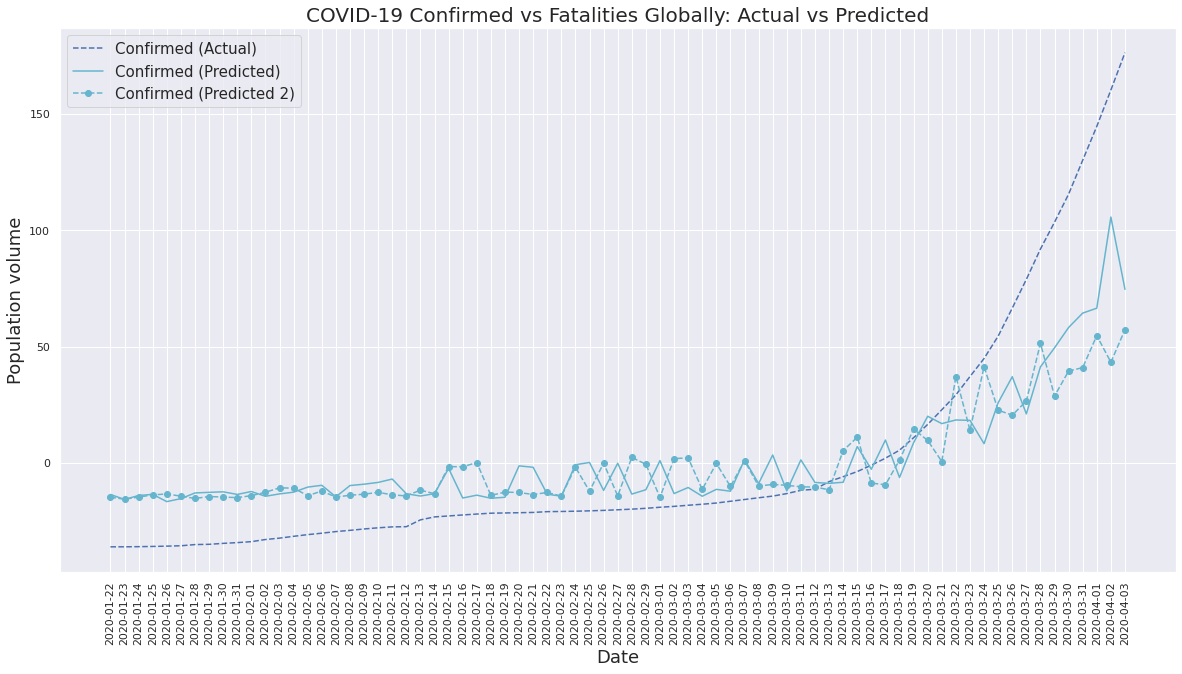

In [ ]:
x_ = actuals_vs_predict_grpd['Date']
Actual_C = actuals_vs_predict_grpd['Confirmed (Actual)']
Predict_C = actuals_vs_predict_grpd['Confirmed (Predicted)']
Predict_C2 = actuals_vs_predict_grpd['Confirmed (Predicted 2)']

sns.set()
plt.figure(figsize=(20,10))
plt.plot(x_,Actual_C,"--b",label='Confirmed (Actual)')
plt.plot(x_,Predict_C,"-c",label='Confirmed (Predicted)')
plt.plot(x_,Predict_C2,"--co",label='Confirmed (Predicted 2)')
plt.xlabel('Date',fontsize=18)
plt.xticks(rotation=90)
plt.ylabel('Population volume',fontsize=18)
plt.title('COVID-19 Confirmed vs Fatalities Globally: Actual vs Predicted',fontsize=20)
plt.legend(loc="upper left",fontsize=15)
plt.show()

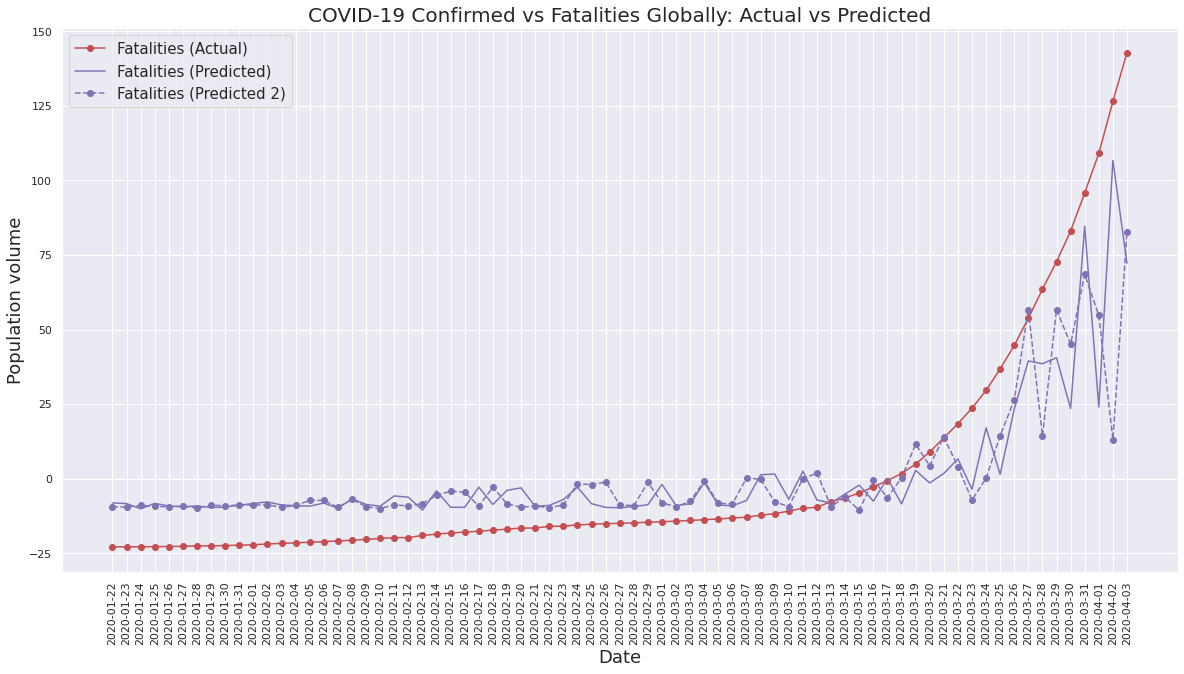

In [ ]:
x_ = actuals_vs_predict_grpd['Date']
Actual_F = actuals_vs_predict_grpd['Fatalities (Actual)']
Predict_F = actuals_vs_predict_grpd['Fatalities (Predicted)']
Predict_F2 = actuals_vs_predict_grpd['Fatalities (Predicted 2)']

sns.set()
plt.figure(figsize=(20,10))
plt.plot(x_,Actual_F,"-ro",label='Fatalities (Actual)')
plt.plot(x_,Predict_F,"-m",label='Fatalities (Predicted)')
plt.plot(x_,Predict_F2,"--mo",label='Fatalities (Predicted 2)')
plt.xlabel('Date',fontsize=18)
plt.xticks(rotation=90)
plt.ylabel('Population volume',fontsize=18)
plt.title('COVID-19 Confirmed vs Fatalities Globally: Actual vs Predicted',fontsize=20)
plt.legend(loc="upper left",fontsize=15)
plt.show()

In [ ]:
# Things to do:
# Plotting Actual vs Predicted
# Deep Learning
# Time Series Modeling
# Time Series plot of Actual vs Predicted Confirmed Globally
# Time Series plot of Actual vs Predicted Fatalities Globally
# Time Series plot of Actual vs Predicted Confirmed per Country
# Time Series plot of Actual vs Predicted Fatalities per Country

# Adding other data to the Model Data e.g. Population Census: https://worldpopulationreview.com

### **References**

1.   One-Hot Encoding: https://pbpython.com/categorical-encoding.html
2.   

